In [20]:
import numpy as np
import pandas as pd


In [21]:
raw_traffic_data = pd.read_excel('data/TRAFFIC ACCIDENTS DATA.xlsx')
raw_traffic_data.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


**Select columns to be used**

In [22]:
traffic_df = raw_traffic_data.drop(columns = ["Weather conditions" ,"Accident Spot" ,"Area" ,"Time of the Accidents" ,"Brief Accident Details/Cause" ,"Victims"])
traffic_df.head()

,Date,County,Road/ Highway,Total people confirmed dead
0,2023-08-08,Nakuru,Nakuru-Eldoret Highway,4
1,2023-08-07,Nakuru,Maai-Mahiu Naivasha Highway,1
2,2023-07-25,Narok,Narok Mai Mahiu road,4
3,2022-12-02,Narok,Narok Mai Mahiu road,3
4,2022-12-01,Kirinyaga,Kerugoya-Karatina Road,1


In [23]:
# traffic_df.info()
null_dead_df = traffic_df[traffic_df["Total people confirmed dead"].isna()]
null_dead_df
clean_df = traffic_df.fillna(0)
clean_df

,Date,County,Road/ Highway,Total people confirmed dead
0,2023-08-08 00:00:00,Nakuru,Nakuru-Eldoret Highway,4
1,2023-08-07 00:00:00,Nakuru,Maai-Mahiu Naivasha Highway,1
2,2023-07-25 00:00:00,Narok,Narok Mai Mahiu road,4
3,2022-12-02 00:00:00,Narok,Narok Mai Mahiu road,3
4,2022-12-01 00:00:00,Kirinyaga,Kerugoya-Karatina Road,1
...,...,...,...,...
76,2022-06-03 00:00:00,Vihiga,Nairobi Kakamega road,1
77,2022-05-31 00:00:00,Kajiado,Namanga Road,1
78,2022-05-30 00:00:00,Nakuru,Naivasha Nairobi Highway,1
79,2022-02-28 00:00:00,Nakuru,Nakuru - Nairobi highway,4


In [24]:

clean_df['Total people confirmed dead'] = pd.to_numeric(clean_df['Total people confirmed dead'], errors='coerce').astype('Int64')

clean_df.dtypes

# location_based_casualty_df = clean_df[["County", "Total people confirmed dead"]]
# location_based_casualty_df


Date                           object
County                         object
Road/ Highway                  object
Total people confirmed dead     Int64
dtype: object

In [25]:
location_based_casualty_df = clean_df[["County", "Total people confirmed dead"]]
location_based_casualty_df["County"].unique()

array(['Nakuru', 'Narok', 'Kirinyaga', "Murang'a", 'Tharaka Nithi',
       'Nairobi ', 'Naivasha', 'Makueni', 'Bomet', 'Kisumu', 'Kajiado',
       'Kwale', 'Nairobi', 'Homabay', 'Kakamega', 'Isiolo',
       'Uansin Gishi', 'Migori', 'Kiambu', 'Taita Taveta', 'Kisii',
       'Kilifi', 'Muranga', 'Turkana', 'Kitui', 'Vihiga'], dtype=object)

### Distribution of Fatalities

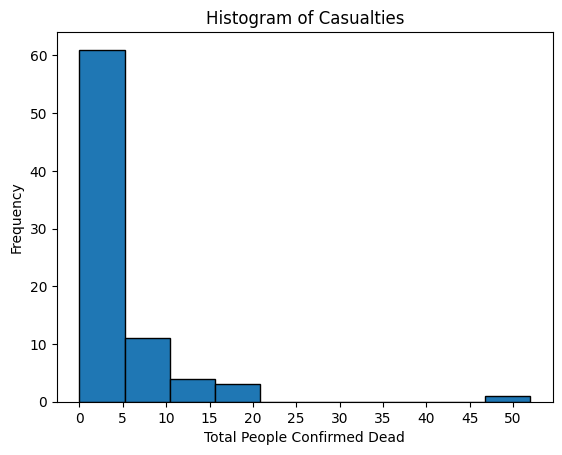

In [26]:
import matplotlib.pyplot as plt
import numpy as np


# Create the histogram
plt.hist(location_based_casualty_df['Total people confirmed dead'], edgecolor='black')

# Customize x-axis ticks
start, end = clean_df['Total people confirmed dead'].min(), clean_df['Total people confirmed dead'].max() # get min/max values
bins = np.arange(start, end , 5) # create bins with increments of 5
plt.xticks(bins) # set the ticks to these bins

# Add labels and title
plt.xlabel('Total People Confirmed Dead')
plt.ylabel('Frequency')
plt.title('Histogram of Casualties')

# Display the histogram
plt.show()

In [27]:
clean_df[clean_df["Total people confirmed dead"] > 40]

,Date,County,Road/ Highway,Total people confirmed dead
18,2023-06-30 00:00:00,Nakuru,Nakuru Kericho Highway,52


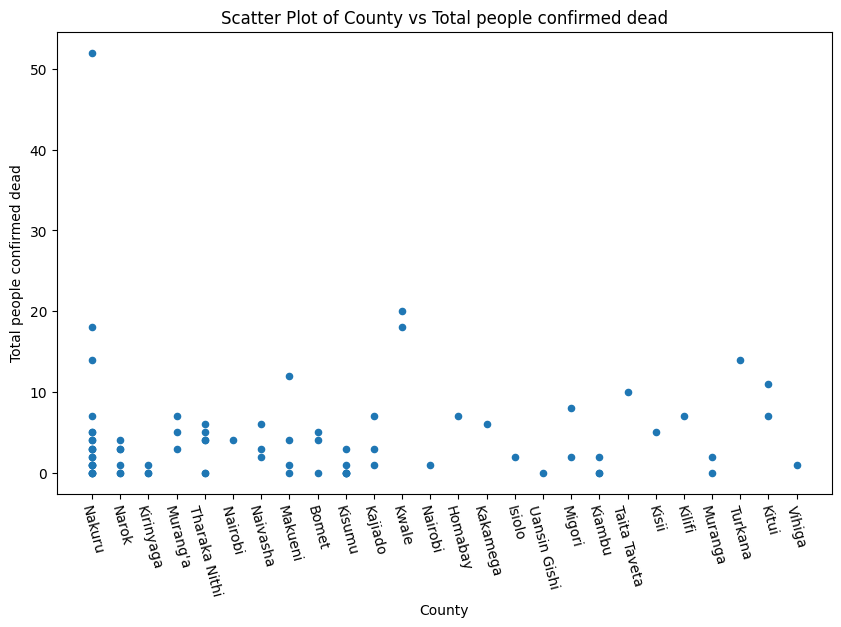

In [28]:
location_based_casualty_df.plot(kind='scatter', x='County', y='Total people confirmed dead', figsize=(10, 6))
plt.xlabel('County')
plt.ylabel('Total people confirmed dead')
plt.title('Scatter Plot of County vs Total people confirmed dead')
plt.xticks(rotation=-75)
plt.show()

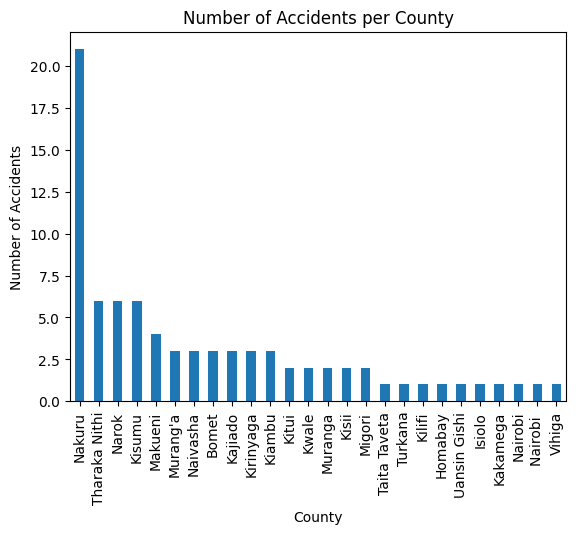

In [29]:
location_based_casualty_df["County"].value_counts().plot(kind="bar")
plt.xlabel("County")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per County")
plt.show()

#### label encoding to convert county to numeric inorder of county with highest number of people dead


In [30]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
location_based_casualty_df["County"] = encoder.fit_transform(location_based_casualty_df["County"])
location_based_casualty_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11772\1589098982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_based_casualty_df["County"] = encoder.fit_transform(location_based_casualty_df["County"])


,County,Total people confirmed dead
0,19,4
1,19,1
2,20,4
3,20,3
4,7,1
...,...,...
76,25,1
77,3,1
78,19,1
79,19,4


In [31]:
location_based_casualty_df["County"].value_counts().sort_values(ascending=False)

County
19    21
22     6
20     6
9      6
12     4
14     3
18     3
0      3
3      3
7      3
5      3
13     2
8      2
15     2
11     2
10     2
21     1
23     1
6      1
1      1
24     1
2      1
4      1
16     1
17     1
25     1
Name: count, dtype: int64

In [32]:
location_based_casualty_df["Total people confirmed dead"].fillna(0, inplace=True)
location_based_casualty_df["county_safe_to_go"] = location_based_casualty_df.apply(lambda row: 1 if row["Total people confirmed dead"] < 10 else 0, axis=1)

location_based_casualty_df["county_safe_to_go"].value_counts()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11772\3505259235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  location_based_casualty_df["Total people confirmed dead"].fillna(0, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11772\3505259235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_based_casualty_df["Total peo

county_safe_to_go
1    72
0     9
Name: count, dtype: int64

In [33]:
location_based_casualty_df

,County,Total people confirmed dead,county_safe_to_go
0,19,4,1
1,19,1,1
2,20,4,1
3,20,3,1
4,7,1,1
...,...,...,...
76,25,1,1
77,3,1,1
78,19,1,1
79,19,4,1


# **Model Training**

In [34]:
X = location_based_casualty_df[["County", "Total people confirmed dead"]].values
y = location_based_casualty_df["county_safe_to_go"].values

## Splitting data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42) # random_state


## Scaling the data

In [36]:
# Test whether scaling is necessarry
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((48, 2), (33, 2))

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



models = {"RandomForest": RandomForestClassifier(), # random forest classifier model
          "SVC":SVC(), # support vector classifier model
          "Logistic Regression":LogisticRegression(), # logistic regression model
          "KNN": KNeighborsClassifier() # K-nearest neighbors model
          }


results = {}
cross_val_scores = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # cross validation to prevent overfitting
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    cross_val_scores[name] = scores.mean()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name}: Accuracy: {accuracy}") # accuracy close to 1
    print(f"Cross Validation Score: {scores.mean()}")

RandomForest: Accuracy: 1.0
Cross Validation Score: 0.9800000000000001
SVC: Accuracy: 0.9696969696969697
Cross Validation Score: 0.9355555555555555
Logistic Regression: Accuracy: 1.0
Cross Validation Score: 0.9577777777777777
KNN: Accuracy: 1.0
Cross Validation Score: 0.9155555555555555


In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your model and have X_test_scaled and y_test
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Unsafe'], yticklabels=['Safe', 'Unsafe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

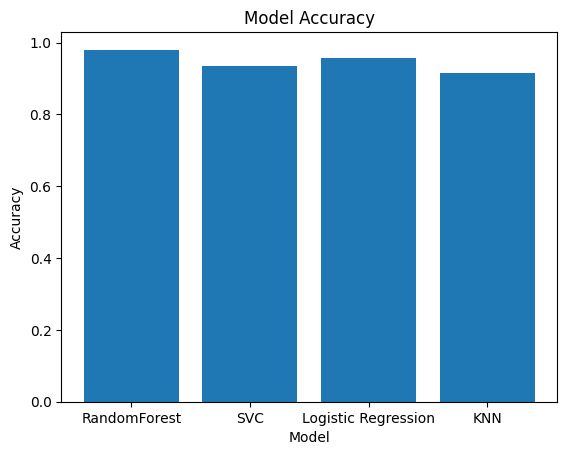

In [22]:
import matplotlib.pyplot as plt
plt.bar(cross_val_scores.keys(), cross_val_scores.values())
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

# Hyper-parameter Tuning

In [23]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

models = {"RandomForest": RandomForestClassifier(), # random forest classifier model
          "SVC":SVC(), # support vector classifier model
          "Logistic Regression":LogisticRegression(), # logistic regression model
          "KNN": KNeighborsClassifier() # K-nearest neighbors model
          }

params = {"RandomForest": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20],
            },
          "SVC": {
              "C": [0.1, 1, 10],
              "kernel": ["linear", "rbf"],
            },
          "Logistic Regression": {
              "C": [0.1, 1, 10],
              "penalty": ["l1", "l2"],
              "solver": ["liblinear", "saga"],
            },
          "KNN": {
              "n_neighbors": [3, 5, 7], # 3,5,7 means that
              "weights": ["uniform", "distance"],

            },
          }

grid_search_results = {}
best_models = {}
best_scores = {}
for name, model in models.items():
    # using stratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, params[name], cv=skf)

    # # For Logistic Regression with 'saga' solver increase max iter
    if name == "Logistic Regression" and "saga" in params[name]["solver"]:
        # Update the params dictionary for Logistic Regression
        params[name]['max_iter'] = [1000]  # Add max_iter to the param grid
        # Re-initialize GridSearchCV with the updated params
        grid_search = GridSearchCV(model, params[name], cv=skf)

    grid_search.fit(X_train_scaled, y_train)
    grid_search_results[name] = grid_search
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    print(f"{name}: Best Score: {grid_search.best_score_}")
    # print(f"{name}: Best Params: {grid_search.best_params_}")






C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomForest: Best Score: 0.9800000000000001
SVC: Best Score: 1.0


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn

Logistic Regression: Best Score: 1.0
KNN: Best Score: 0.9800000000000001


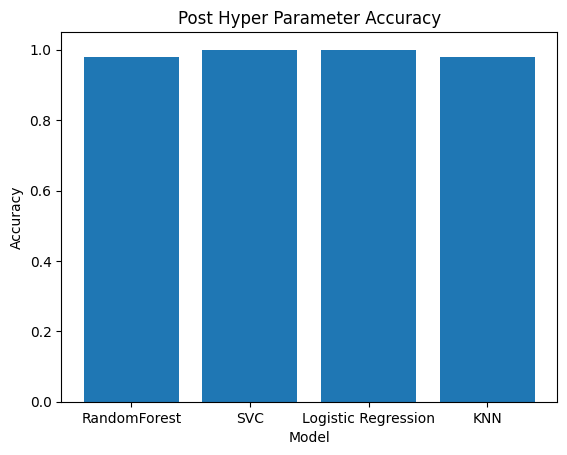

In [24]:
#plot the results
plt.bar(best_scores.keys(), best_scores.values())
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Post Hyper Parameter Accuracy")
plt.show()

In [25]:
from sklearn.metrics import classification_report
#evaluate the best model
for name , model in best_models.items():
    print(f"Report for {name}:")
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test,y_pred)
    print(report, "\n")


Report for RandomForest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        28

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33
 

Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        28

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33
 

Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        28

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        

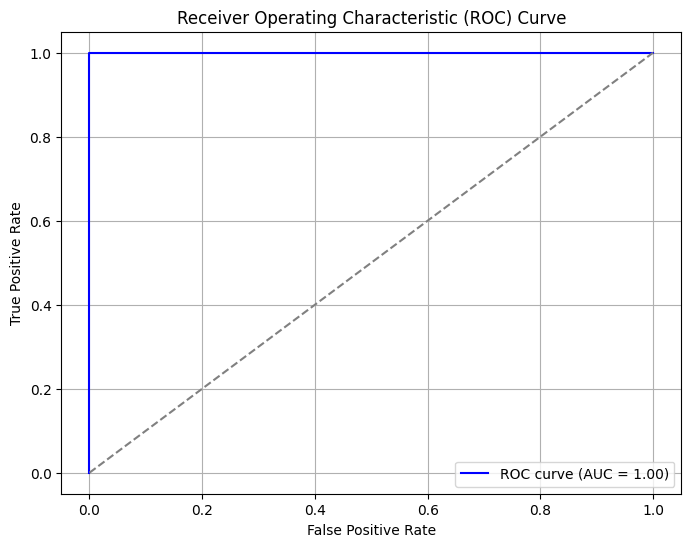

AUC: 1.00


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#auc score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")